In [1]:
import pickle

with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)


with open('testY.pkl', 'rb') as f:
    testY = pickle.load(f)


with open('le.pkl', 'rb') as f:
    le = pickle.load(f)


In [2]:
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

2021-09-15 15:21:53.881776: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:

batch_size = 10


In [4]:
def metrics(model, batch_size=40):    
    predIdxs = model.predict(testX, batch_size=batch_size)
    predIdxs = np.argmax(predIdxs, axis=1)
    print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))
    modelLoss, modelAccuracy = model.evaluate(testX, testY)

    print('Test Loss is {}'.format(modelLoss))
    print('Test Accuracy is {}'.format(modelAccuracy ))
    class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
    y_pred = model.predict(testX)
    print(class_names[np.argmax(y_pred[11])])
    x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
    Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

    sns.set(font_scale=1.5, color_codes=True, palette='deep')
    sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title('Confusion Matrix')
    plt.show()

2021-09-15 15:21:55.005218: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-15 15:21:55.005733: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-15 15:21:55.090333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 15:21:55.090540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2021-09-15 15:21:55.090558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-15 15:21:55.091479: I tensorflow/stream_executor/platfo

              precision    recall  f1-score   support

    Covid-19    0.76840   0.69295   0.72873       723
Lung Opacity    0.74506   0.87770   0.80596      1202
      Normal    0.87150   0.82491   0.84757      2039
   Pneumonia    0.93617   0.81784   0.87302       269

    accuracy                        0.81691      4233
   macro avg    0.83028   0.80335   0.81382      4233
weighted avg    0.82210   0.81691   0.81707      4233

133/133 [==============================] - 2s 12ms/step - loss: 0.2222 - acc: 0.8169
Test Loss is 0.22219161689281464
Test Accuracy is 0.8169147372245789
Lung Opacity


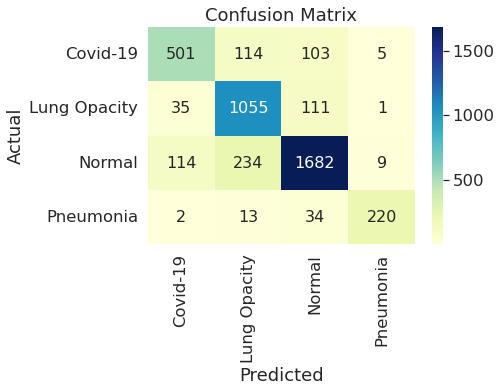

In [5]:
# model = keras.models.load_model('CNN_Covid19_Xray_V1.h5')
# metrics(model)
# model = keras.models.load_model('resnet50_model.h5')
# metrics(model)
# model = keras.models.load_model('vgg16_model.h5')
# metrics(model)
model = keras.models.load_model('alexnet_model.h5')
metrics(model)

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 35, 35, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 35, 35, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 96)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 17, 17, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
activation_9 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

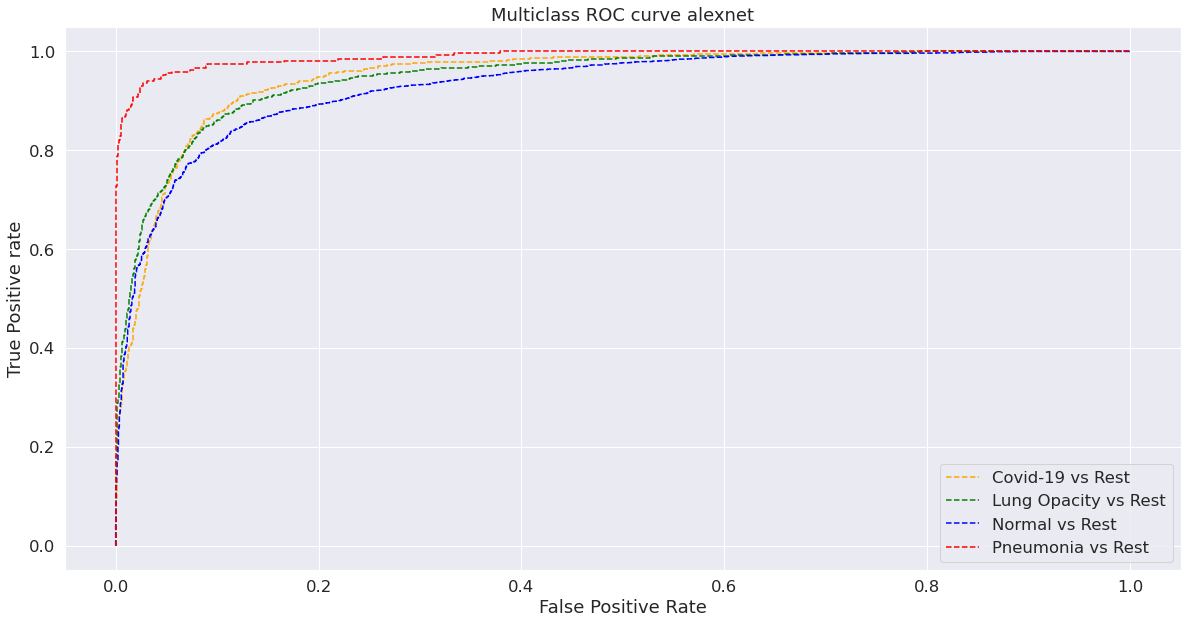

{0: 0.9496077202854519,
 1: 0.9478684212115407,
 2: 0.9311036206909654,
 3: 0.9892348984728729}

In [8]:
predIdxs = model.predict(testX, batch_size=batch_size)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn
from sklearn.preprocessing import label_binarize

fpr, tpr, thresh = roc_curve(testY.argmax(axis=1),predIdxs.argmax(axis=1), pos_label=1)
random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY.argmax(axis=1), random_probs, pos_label=1)

class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']

auc_score = roc_auc_score(testY, predIdxs, multi_class='ovo')
auc_score

fpr = {}
tpr = {}
roc_auc ={}
y = label_binarize(testY, classes=[0, 1, 2,3])
n_classes = y.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], predIdxs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])    

plt.figure(figsize=(20,10))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=le.classes_[0] +' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=le.classes_[1]+ ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=le.classes_[2]+' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=le.classes_[3]+' vs Rest')

plt.title('Multiclass ROC curve alexnet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

roc_auc

In [13]:
for i in roc_auc.keys():
    print("auc for " + str(le.classes_[i])+ ' = ' + str(roc_auc[i]))

auc for Covid-19 = 0.9496077202854519
auc for Lung Opacity = 0.9478684212115407
auc for Normal = 0.9311036206909654
auc for Pneumonia = 0.9892348984728729
